## Fourth Assignment 
Giovanni Celotto

due May 8

In [3]:
library(ggplot2)
library(tidyverse)
library('Cairo')
CairoFonts(
regular="FreeSans:style=Medium",
bold="FreeSans:style=Bold",
italic="FreeSans:style=Oblique",
bolditalic="FreeSans:style=BoldOblique"
)
library(lubridate)
library(gridExtra) # multiplot ggplot
library(scales)

## Exercise 1
Community Mobility Reports have been created with the aim to provide insights into
what has changed in response to policies aimed at combating COVID-19. Data can be found at https://www.google.com/covid19/mobility/

* Download and analyze the following data sets:
 https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv
and - https://www.gstatic.com/covid19/mobility/Region_Mobility_Report_CSVs.zip

The data show how visitors to (or time spent in) categorized places change compared to
baseline days. A baseline day represents a normal value for that day of the week. The
baseline day is the median value from the 5-week period Jan 3 – Feb 6, 2020.

To make the reports useful, categories have been used to group some of the places with similar characteristics for purposes of social distancing guidance. The following categories are available:

- retail and recreation, i.e. places like restaurants,cafes, shopping centers, theme parks,museums,
libraries, and movie theaters
- grocery and pharmacy, i.e. grocery markets, food warehouses, farmers markets, specialty
food shops, drug stores, and pharmacies
- parks, i.e. national parks, public beaches, marinas, dog parks, plazas,and public gardens
- transit stations i.e. all public transport hubs such as subway, bus, and train stations
- workplaces, i.e. places of work
- residential, i.e. people’s residence



* Select a couple of European countries of your choice and analyze the trends in the previous variables over time:

* produce a plot of the data by averaging the observable over a period of one week (hint:
convert the data field to lubridate::week) and one month and quantify the impact of COVID-
19 restrictions on mobility sitations.

#### Solution
I'm going to analyze the trends of the variables for Italy, Germany and France in 2020 averaging over a week and afterwards over a month. The choice of the year is because in that year there were more restrictions, hence we expect more negative values in these mobility categories

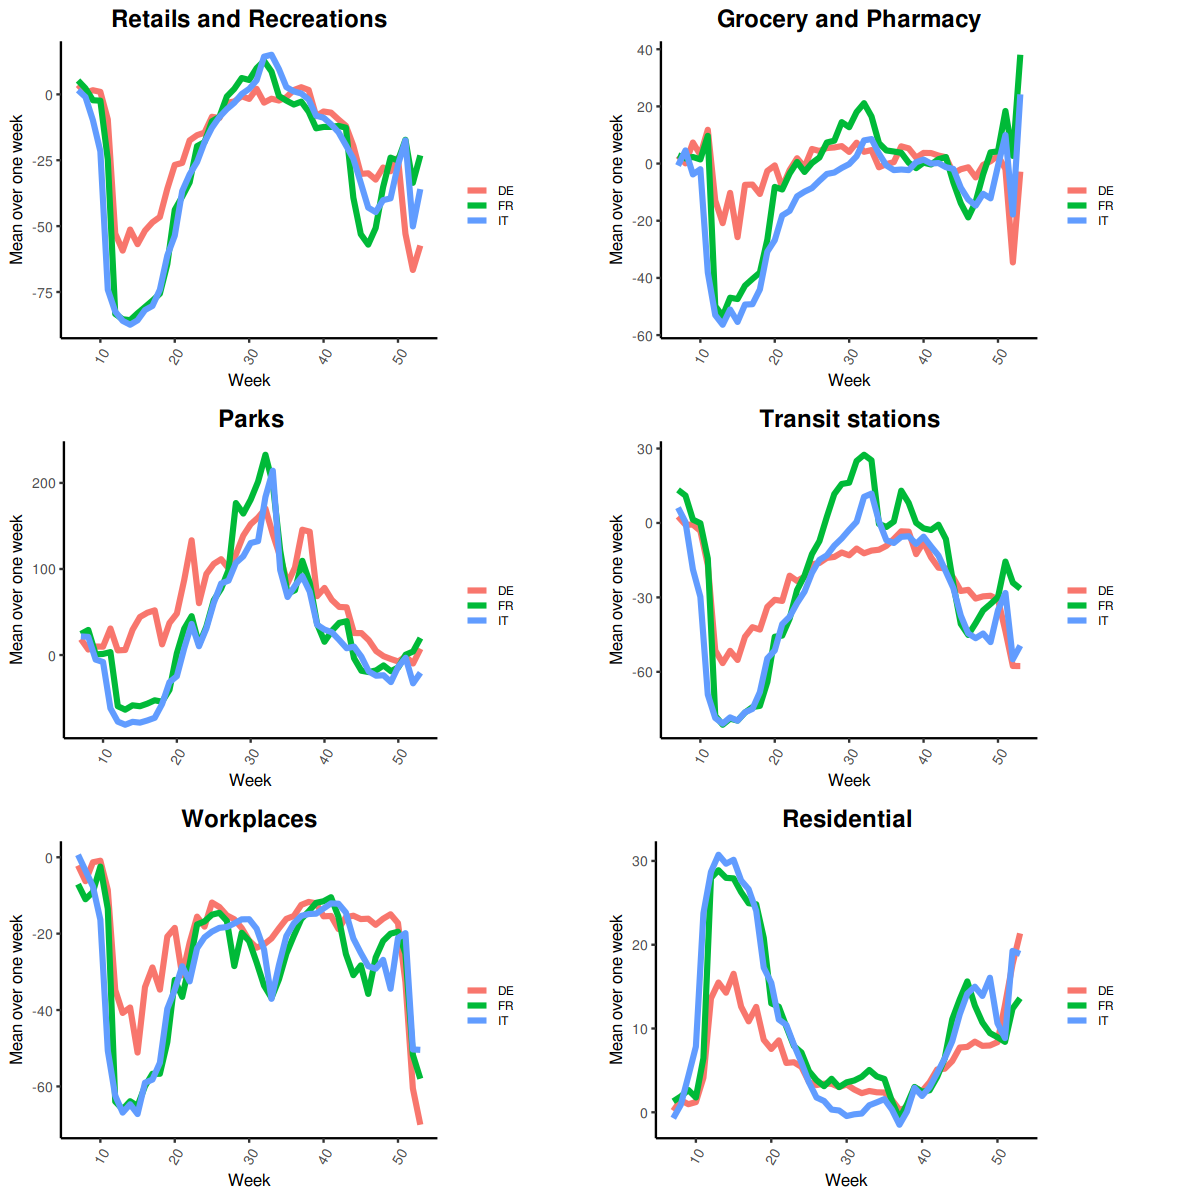

In [4]:
#3 df for the 3 countries
df_it <- as.data.frame(read.csv("data/Region_Mobility_Report_CSVs/2020_IT_Region_Mobility_Report.csv",
                                header = TRUE ))
df_fr <- as.data.frame(read.csv("data/Region_Mobility_Report_CSVs/2020_FR_Region_Mobility_Report.csv",
                                header = TRUE ))
df_de <- as.data.frame(read.csv("data/Region_Mobility_Report_CSVs/2020_DE_Region_Mobility_Report.csv",
                                header = TRUE ))

#grouping over the week so that the operations will be done among data of the same week
by_week_it <- df_it %>% group_by(week = week(df_it$date))
by_week_fr <- df_fr %>% group_by(week = week(df_fr$date))
by_week_de <- df_de %>% group_by(week = lubridate::week(df_de$date))

#averaging over the same week for the 3 countries
by_week_it <- by_week_it %>%
  summarise(retail_and_recr = mean(retail_and_recreation_percent_change_from_baseline, na.rm = TRUE),
            groc_and_pharm  = mean(grocery_and_pharmacy_percent_change_from_baseline, na.rm = TRUE),
            parks           = mean(parks_percent_change_from_baseline, na.rm = TRUE),
            trans_stat      = mean(transit_stations_percent_change_from_baseline, na.rm = TRUE),
            workplaces      = mean(workplaces_percent_change_from_baseline,na.rm = TRUE),
            residential     = mean(residential_percent_change_from_baseline, na.rm = TRUE),
            Country         = "IT"
            )

by_week_fr <- by_week_fr %>%
  summarise(retail_and_recr = mean(retail_and_recreation_percent_change_from_baseline, na.rm = TRUE),
            groc_and_pharm  = mean(grocery_and_pharmacy_percent_change_from_baseline, na.rm = TRUE),
            parks           = mean(parks_percent_change_from_baseline, na.rm = TRUE),
            trans_stat      = mean(transit_stations_percent_change_from_baseline, na.rm = TRUE),
            workplaces      = mean(workplaces_percent_change_from_baseline, na.rm = TRUE),
            residential     = mean(residential_percent_change_from_baseline, na.rm = TRUE),
            Country         = "FR"
            )

by_week_de <- by_week_de %>%
  summarise(retail_and_recr = mean(retail_and_recreation_percent_change_from_baseline, na.rm = TRUE),
            groc_and_pharm  = mean(grocery_and_pharmacy_percent_change_from_baseline,na.rm = TRUE),
            parks           = mean(parks_percent_change_from_baseline, na.rm = TRUE),
            trans_stat      = mean(transit_stations_percent_change_from_baseline, na.rm = TRUE),
            workplaces      = mean(workplaces_percent_change_from_baseline, na.rm = TRUE),
            residential     = mean(residential_percent_change_from_baseline, na.rm = TRUE),
            Country         = "DE"
            )

#merging the 3 df
by_week <- rbind(by_week_de, by_week_fr, by_week_it) 
#by_week$week <- as.numeric(by_week$week)

#defining two lists for graphic purposes: I will plot all the variables with a for cycle
categories <- c("retail_and_recr", "groc_and_pharm", "parks", "trans_stat", "workplaces", "residential")
Titles <- c("Retails and Recreations", "Grocery and Pharmacy", "Parks", "Transit stations", "Workplaces", "Residential")
options(repr.plot.width=10, repr.plot.height=10) 
p <- list()
p[[1]] <- ggplot(by_week) + aes(    x= week, y = retail_and_recr, group = Country, colour = Country)
p[[2]] <- ggplot(by_week) + aes(    x= week, y = groc_and_pharm, group = Country, colour = Country)
p[[3]] <- ggplot(by_week) + aes(    x= week, y = parks, group = Country, colour = Country)
p[[4]] <- ggplot(by_week) + aes(    x= week, y = trans_stat, group = Country, colour = Country)
p[[5]] <- ggplot(by_week) + aes(    x= week, y = workplaces, group = Country, colour = Country)
p[[6]] <- ggplot(by_week) + aes(    x= week, y = residential, group = Country, colour = Country)





for (i in c(1:6)){
    p[[i]] <- p[[i]]+      #different color for each country
                geom_line(size=1.3) +                    #linking with lines
                labs(title = Titles[i],
                         x = "Week",
                         y = "Mean over one week",
                         colour = "")+
                theme_classic()+
                theme(text = element_text(size=20),             #size of labels
                        plot.title = element_text(size=rel(0.7),hjust = 0.5, face="bold"),
                        axis.text.y = element_text(size=rel(0.5), hjust = 1),
                        axis.text.x = element_text(size=rel(0.5),hjust = 1,angle=60),
                        axis.title.y = element_text(size = rel(0.5), angle = 90),
                        axis.title.x = element_text(size = rel(0.5)),
                        legend.key.size = unit(0.5, 'cm'),legend.key.height = unit(0.3, 'cm'), 
                        legend.key.width = unit(0.5, 'cm'), legend.title = element_text(size=12),
                        legend.text = element_text(size=7),
                        legend.background = element_rect(fill=alpha('white', 0.))
                        )


}




grid.arrange(grobs = p, nrow=2, ncol = 3, layout_matrix = rbind(c(1, 2), c(3, 4), c(5, 6)), byrow = TRUE)

#### Qualitative discussion
As one can see from the data, the impact of COVID-19 on these categories is clearly visible. The most striking change with respect to the baseline is the one of *Workplaces*, that starting from the $10^{th}$ week approximately, began to fall down to negative values. This is the period in which the first restrictions were introduced. 

The same behaviour can be observed in other categories, especially *Retails and Recreations* and *Transit Stations*.
On the other side, the category *Residential* started to grow as a consequence of the restrictions.

A more baseline-like situation seems to appear during the $25^{th}$ week of the year, that is the beginning of June, when the restrictions were more flexible

Comparing the three countries we can see that *Italy* and *France* had more similar trends in almost all the categories, whereas in Germany usually the impact of COVID-19 was less visible, but still evident.



Now we will repeat the same procedure averaging over the months:

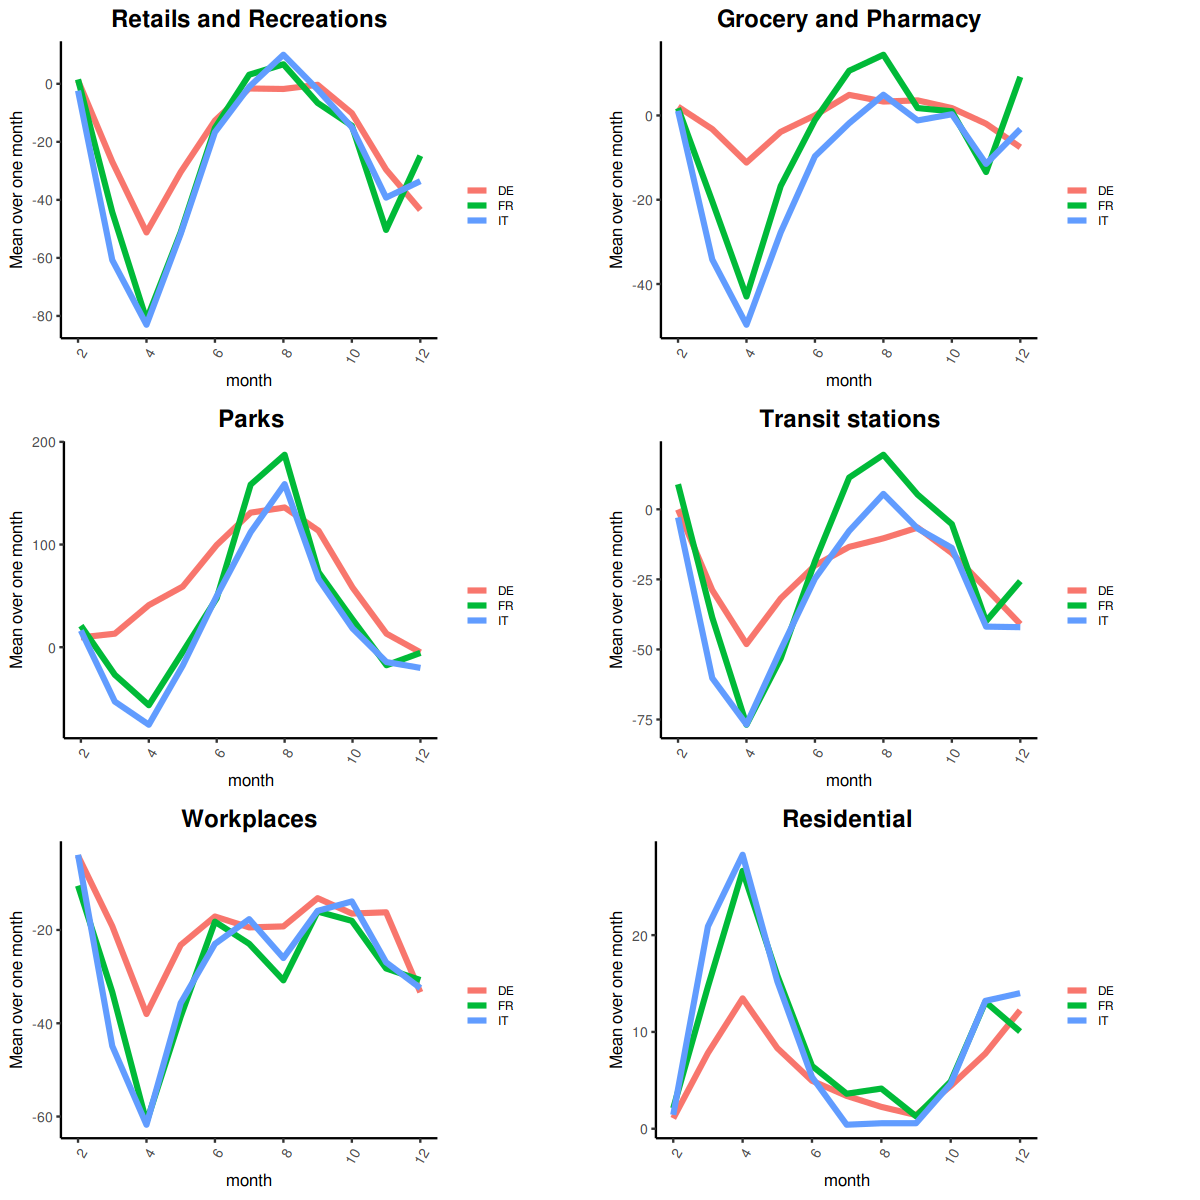

In [5]:
#3 df for the 3 countries
df_it <- as.data.frame(read.csv("data/Region_Mobility_Report_CSVs/2020_IT_Region_Mobility_Report.csv",
                                header = TRUE ))
df_fr <- as.data.frame(read.csv("data/Region_Mobility_Report_CSVs/2020_FR_Region_Mobility_Report.csv",
                                header = TRUE ))
df_de <- as.data.frame(read.csv("data/Region_Mobility_Report_CSVs/2020_DE_Region_Mobility_Report.csv",
                                header = TRUE ))

#grouping over the month so that the operations will be done among data of the same month
by_month_it <- df_it %>% group_by(month = month(df_it$date))
by_month_fr <- df_fr %>% group_by(month = month(df_fr$date))
by_month_de <- df_de %>% group_by(month = lubridate::month(df_de$date))

#averaging over the same month for the 3 countries
by_month_it <- by_month_it %>%
  summarise(retail_and_recr = mean(retail_and_recreation_percent_change_from_baseline, na.rm = TRUE),
            groc_and_pharm  = mean(grocery_and_pharmacy_percent_change_from_baseline, na.rm = TRUE),
            parks           = mean(parks_percent_change_from_baseline, na.rm = TRUE),
            trans_stat      = mean(transit_stations_percent_change_from_baseline, na.rm = TRUE),
            workplaces      = mean(workplaces_percent_change_from_baseline, na.rm = TRUE),
            residential     = mean(residential_percent_change_from_baseline, na.rm = TRUE),
            Country         = "IT"
            )

by_month_fr <- by_month_fr %>%
  summarise(retail_and_recr = mean(retail_and_recreation_percent_change_from_baseline, na.rm = TRUE),
            groc_and_pharm  = mean(grocery_and_pharmacy_percent_change_from_baseline, na.rm = TRUE),
            parks           = mean(parks_percent_change_from_baseline, na.rm = TRUE),
            trans_stat      = mean(transit_stations_percent_change_from_baseline, na.rm = TRUE),
            workplaces      = mean(workplaces_percent_change_from_baseline, na.rm = TRUE),
            residential     = mean(residential_percent_change_from_baseline, na.rm = TRUE),
            Country         = "FR"
            )

by_month_de <- by_month_de %>%
  summarise(retail_and_recr = mean(retail_and_recreation_percent_change_from_baseline, na.rm = TRUE),
            groc_and_pharm  = mean(grocery_and_pharmacy_percent_change_from_baseline,na.rm = TRUE),
            parks           = mean(parks_percent_change_from_baseline, na.rm = TRUE),
            trans_stat      = mean(transit_stations_percent_change_from_baseline, na.rm = TRUE),
            workplaces      = mean(workplaces_percent_change_from_baseline, na.rm = TRUE),
            residential     = mean(residential_percent_change_from_baseline, na.rm = TRUE),
            Country         = "DE"
            )

#merging the 3 df
by_month <- rbind(by_month_de, by_month_fr, by_month_it) 
#by_month$month <- as.numeric(by_month$month)

#defining two lists for graphic purposes: I will plot all the variables with a for cycle
categories <- c("retail_and_recr", "groc_and_pharm", "parks", "trans_stat", "workplaces", "residential")
Titles <- c("Retails and Recreations", "Grocery and Pharmacy", "Parks", "Transit stations", "Workplaces", "Residential")
options(repr.plot.width=10, repr.plot.height=10) 
p <- list()
p[[1]] <- ggplot(by_month) + aes(    x= month, y = retail_and_recr, group = Country, colour = Country)
p[[2]] <- ggplot(by_month) + aes(    x= month, y = groc_and_pharm, group = Country, colour = Country)
p[[3]] <- ggplot(by_month) + aes(    x= month, y = parks, group = Country, colour = Country)
p[[4]] <- ggplot(by_month) + aes(    x= month, y = trans_stat, group = Country, colour = Country)
p[[5]] <- ggplot(by_month) + aes(    x= month, y = workplaces, group = Country, colour = Country)
p[[6]] <- ggplot(by_month) + aes(    x= month, y = residential, group = Country, colour = Country)





for (i in c(1:6)){
    p[[i]] <- p[[i]]+      #different color for each country
                geom_line(size=1.3) +                    #linking with lines
                labs(title = Titles[i],
                         x = "month",
                         y = "Mean over one month",
                         colour = "")+
                theme_classic()+
                theme(text = element_text(size=20),             #size of labels
                        plot.title = element_text(size=rel(0.7),hjust = 0.5, face="bold"),
                        axis.text.y = element_text(size=rel(0.5), hjust = 1),
                        axis.text.x = element_text(size=rel(0.5),hjust = 1,angle=60),
                        axis.title.y = element_text(size = rel(0.5), angle = 90),
                        axis.title.x = element_text(size = rel(0.5)),
                        legend.key.size = unit(0.5, 'cm'),legend.key.height = unit(0.3, 'cm'), 
                        legend.key.width = unit(0.5, 'cm'), legend.title = element_text(size=12),
                        legend.text = element_text(size=7),
                        legend.background = element_rect(fill=alpha('white', 0.))
                        )+
                scale_x_continuous(breaks= pretty_breaks())
                


}




grid.arrange(grobs = p, nrow=2, ncol = 3, layout_matrix = rbind(c(1, 2), c(3, 4), c(5, 6)), byrow = TRUE)

## Exercise 2 - Random number generators
One of the first random number generator was proposed by von Neumann, the so-called middle square algorithm
* write R code to implement this type of generator and, given a fixed digit number input, square it an remove the leading and trailing digits, in order to return a number with the same number of digits as the original number
* Suggestion : after having squared the number, convert it to a list of characters (`number <- unlist(strsplit(as.character(x.squared),""))`) and, after having removed the head and tail of the list, convert it back to a number (`as.numeric(paste(number.after.trimming, collapse=""))`)

In [6]:
### '''Function that returns the number of digits of a given number'''
get_digits <- function(x){
    return (length(unlist(strsplit(as.character(x),""))))
}

#function to convert to chr
convert_to_chr <- function (x){
    return (unlist(strsplit(as.character(x),"")))
}

#function that removes the first and the last n/2 digits from a string
remove_n_digits <- function(x, n){
    for (i in c(1:n/2+1)){           
        x <- x[-1]                      #remove the first element n/2 times
        x <- x[-length(x)]              #remove the last element n/2 times
    }
    return (x)
}




#we impose that the starting number has even number of digits for convenience 
#in order to select the middle digits in an easy way
flag <- FALSE
while(flag != TRUE){
    x0 <- as.numeric(readline(prompt="Write a number with an even number of digits: "))
    if (get_digits(x0)%%2==0){
        flag <- TRUE
    }
    else{
        cat("The number of digits is not even!\n")
    }
    flush.console() 
}


n_digits <- get_digits(x0)
cat("number of digits:              \t",n_digits,"\n")
cat("square:                        \t",x0**2,"\n")
cat("number of digits of the square:\t",get_digits(x0**2),"\n")

chr <- convert_to_chr(x0**2)

#if we have doubled the number of digits we remove half of the initial digits from the beginning and the end
while (length(chr)!=2*n_digits){
    chr <- append(chr, 0,0)
}
cat("Square with even number of digits (adding a zero as first digit if needed): \n\n",chr,"\n\n")
if (length(chr)==2*n_digits){
  chr <- remove_n_digits(chr, n_digits/2)  

}

cat("Removing the leading and trailing digits in order to return a number with the same number of digits as the original number\n")
a <- as.numeric(paste(chr, collapse=""))
a

Write a number with an even number of digits: 1234
number of digits:              	 4 
square:                        	 1522756 
number of digits of the square:	 7 
Square with even number of digits (adding a zero as first digit if needed): 

 0 1 5 2 2 7 5 6 

Removing the leading and trailing digits in order to return a number with the same number of digits as the original number


[1] 5227

The code works as expected, now I write I simple compact algorithm that can be iterated:

In [7]:
## algorithm
algo <- function (x){
    chr <- convert_to_chr(x**2)
    n_digits <- get_digits(x)
    while (length(chr)!=2*n_digits){
    chr <- append(chr, 0,0)
    }
    if (length(chr)==2*n_digits){
    chr <- remove_n_digits(chr, n_digits/2)
    x <- as.numeric(paste(chr, collapse=""))
    return(x)

}
}

algo(5772156649)   #testing with the examples of the slides

[1] 7923805949

## Exercise 3 - Bayesian Inference
A publishing company has recently launched a new journal. In order to determine how effective it is in reaching its possible audience, a market survey company selects a random sample of people from a possible target audience and interviews them. Out of 150 interviewed people, 29 have read the last issue of the journal.

1)  What kind of distribution would you assume for y, the number of people that have seen the last issue of the journal ?


#### Solution
Assuming the set is made of independet answers we have a probability of $p=\frac{29}{150}$ that one person has read the journal and a probability of $q=1-p$ that they have not. This means that the appropriate distribution for the number of people that have seen the last issue (random variable y) is the binomial distribution. 

2) Assuming a uniform prior, what is the posterior distribution for y ?

Since the prior is uniform, then the posterior is proportional to the likelihood (with an appropriate normalization factor)

3) Plot both posterior and likelihood ditributions functions

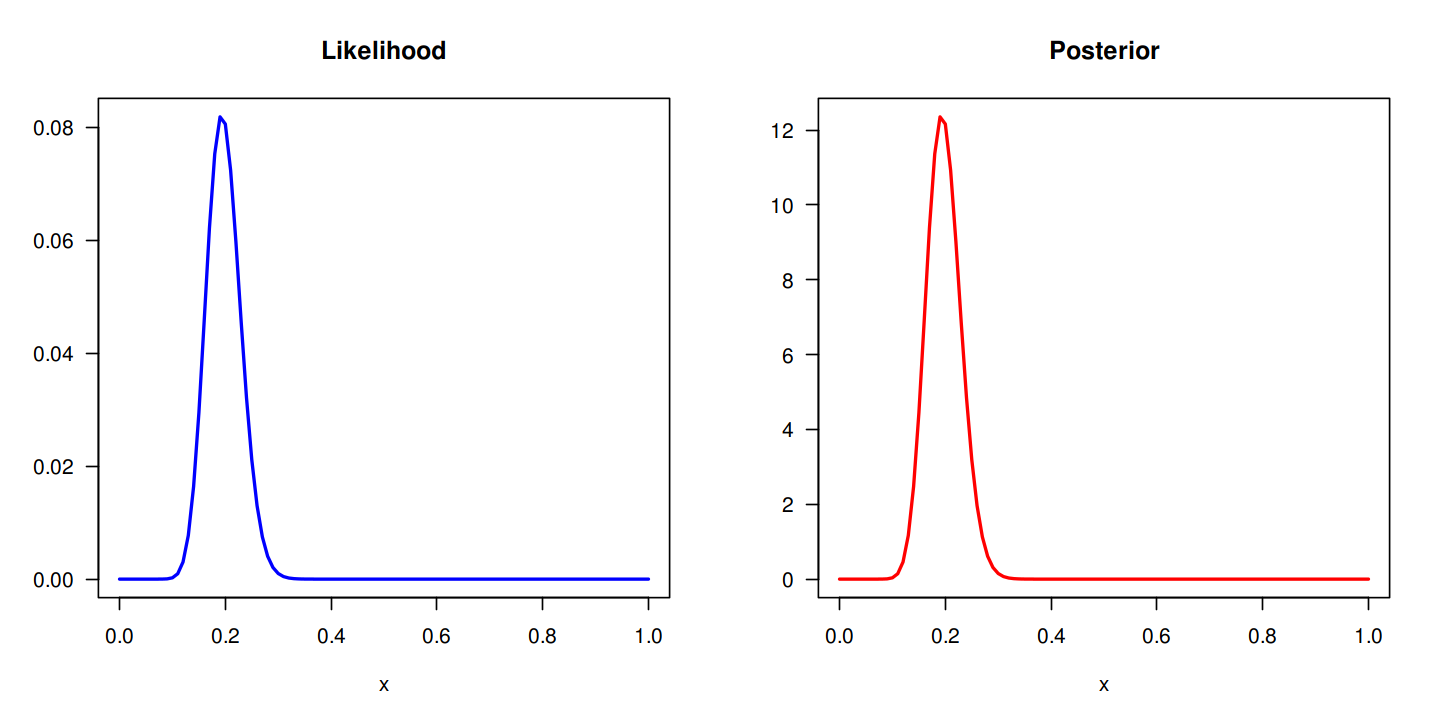

In [8]:
p_area<-matrix(c(1, 2),nrow=1, ncol=2, byrow=TRUE)
layout(p_area)
options(repr.plot.width=12, repr.plot.height=6) 
p <- seq(0,1,0.0001)

interviewed <- 150
readers <- 29


curve(
     dbinom(x=readers, size=interviewed, prob=x),
     type="l",
     col="blue",
     main="Likelihood",
     las=1,
     ylab=" ",
     lwd=2
     )


f <- function (x){
    return (dbinom(readers, interviewed, x))
}


int <- integrate(f,lower=0,upper=1)



curve(
     dbinom(x=readers, size=interviewed, prob=x)/int$value,
     type="l",
     col="red",
     main="Posterior",
     las=1,
     ylab=" ",
     lwd=2
     )

## Exercise 4 - Bayesian Inference
A coin is flipped $n = 30$ times with the following outcomes:
$$
T, T, T, T, T, H, T, T, H, H, T, T, H, H, H, T, H, T, H, T, H, H, T, H, T, H,
T, H, H, H
$$
a) Assuming a flat prior, and a beta prior, plot the likelihood, prior and posterior distributions
for the data set.

b) Evaluate the most probable value for the coin probability p and, integrating the posterior
probability distribution, give an estimate for a 95% credibility interval.

c) Repeat the same analysis assuming a sequential analysis of the data. Show how the most
probable value and the credibility interval change as a function of the number of coin
tosses (i.e. from 1 to 30).

d) Do you get a different result, by analyzing the data sequentially with respect to a one-step
analysis (i.e. considering all the data as a whole) ?

### Solution
a) The appropriate Likelihood for describing this process is the **binomial distribution**.
For what regards the uniform prior we can say that the posterior will be proportional to the likelihood, whereas in the case of the beta distribution we know it is the conjugate prior for this likelihood so the posterior will be again a beta distribution. 

Moreover, since we have no idea if the coin is in principle fair or not but we rely on the fact it is, we assume that $\alpha=\beta$ so that the distribution will be symmetric (which means that the probability of being unfair is the same for head and tail). In order to have a narrow distribution we choose the following value: $\alpha=12$

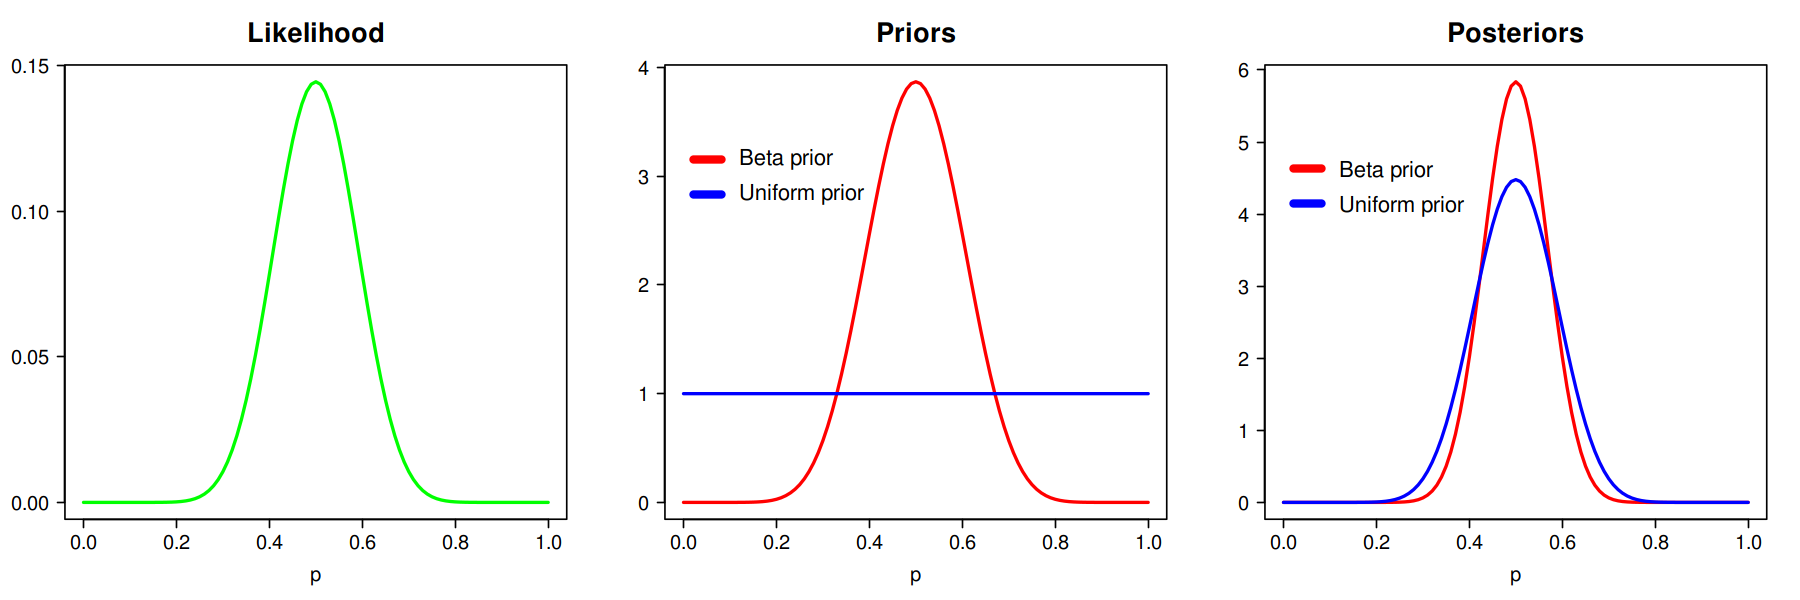

In [9]:
p_area<-matrix(c(1, 2,3),nrow=1, ncol=3, byrow=TRUE)
layout(p_area)
options(repr.plot.width=15, repr.plot.height=5) 


#LIKELIHOOD
f2 <- function (x){
    return (dbinom(15, 30, x))
}


curve(
     f2(x),
     type="l",
     col="green",
     main="Likelihood",
     las=1,
     cex.axis=1.5,
     cex.main=2,
     cex.lab=1.5,
     xlab='p',
     ylab=" ",
     lwd=2
     )
int2 <- integrate(f2,lower=0,upper=1)$value

#***********************************

#PRIORS
alpha <- 12
beta <- 12
#BETA PRIOR
curve(
     dbeta(x, shape1=alpha, shape2=beta),
     type="l",
     col="red",
     main="Priors",
     las=1,
     cex.axis=1.5,
     cex.main=2,
     cex.lab=1.5,
     xlab='p',
     ylab=" ",
     lwd=2,

     )
#UNIFORM PRIOR
curve(
     dunif(x, min=0, max=1),
     type="l",
     col="blue",
     main="Prior",
     las=1,
     cex.axis=1.5,
     cex.main=2,
     cex.lab=1.5,
     xlab='p',
     ylab=" ",
     lwd=2,
    add=TRUE
     )
legend(-0.1, 3.4,
       legend=c(expression(paste("Beta prior")),
                expression(paste("Uniform prior"))),
       col=c("red",
             "blue"),
       cex=1.6,
       x.intersp=0.3,
       y.intersp=2,
       bty = "n",
       lty=1,
       lwd=5,
       seg.len=0.5)


#**************

#POSTERIORS

#normalize the beta posterior
f3 <- function (x){
    return (dbeta(x, alpha, beta)*f2(x))
}
int3 <- integrate(f3, lower=0,upper=1)$value

curve(
     f3(x)/int3,
     type="l",
     col="red",
     main="Posteriors",
     las=1,
     cex.axis=1.5,
     cex.main=2,
     cex.lab=1.5,
     xlab='p',
     ylab=" ",
     lwd=2
     )


curve(
     f2(x)/int2,
     type="l",
     col="blue",
     main="Posteriors",
     las=1,
     cex.axis=1.5,
     cex.main=2,
     cex.lab=1.5,
     xlab='p',
     ylab=" ",
     lwd=2,
     add=TRUE
     )
#options(repr.plot.width=15, repr.plot.height=15) 

legend(-0.1, 5,
       legend=c("Beta prior",
                "Uniform prior"),
       col=c("red",
             "blue"),
       cex=1.6,
       x.intersp=0.3,
       y.intersp=2,
       bty = "n",
       lty=1,
       lwd=5,
       seg.len=0.5)



b)  Evaluate the most probable value for the coin probability p and, integrating the posterior probability distribution, give an estimate for a 95% credibility interval

In the case of Beta prior the mode can be derived analytically:
$$
    Mode=\frac{\alpha_p+r-1}{\alpha_p+\beta_p+n-2}=\frac{12+15-1}{12+12+30-2}=\frac{26}{52}=0.5
$$

The uniform prior can be seen as a beta distribution with $\alpha=\beta=1$ and yields the same result.

Now let's evaluate the 95% of credibility interval: we can use the quantile built-in function of R knowing that both the Posteriors are Beta distributions with well known parameters:

In [10]:
#UNIFORM PRIOR: the posterior is a beta function with alpha=1+r and beta=1+n-r
low_uni <- qbeta(0.025, shape1 = 16, shape2 = 16)
up_uni <- qbeta(0.975, shape1 = 16, shape2 = 16)

#BETA PRIOR: the posterior is a beta function with alpha=alpha_p+r   beta=beta_p+n-r
low_beta <- qbeta(0.025, shape1 = 27, shape2 = 27)
up_beta <- qbeta(0.975, shape1 = 27, shape2 = 27)



cat("95% interval for Uniform prior:\t[",low_uni,",",up_uni,"]\n")
cat("95% interval for Beta prior:   \t[",low_beta,",",up_beta,"]\n")

95% interval for Uniform prior:	[ 0.330606 , 0.669394 ]
95% interval for Beta prior:   	[ 0.3683954 , 0.6316046 ]


c) Repeat the same analysis assuming a sequential analysis of the data. Show how the most probable value and the credibility interval change as a function of the number of coin tosses (i.e. from 1 to 30).

We start from just one data taken and use it to build the first posterior. Afterwards the posterior will be used as a prior of the next toss and so on. The last posterior must be equal to the posterior we have found including all the measurements

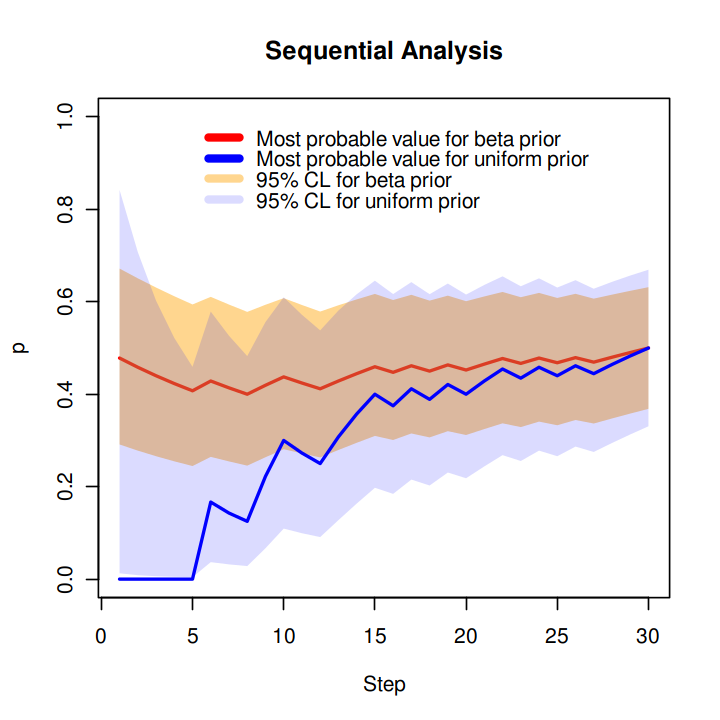

In [11]:
outcomes <- c('T', 'T', 'T', 'T', 'T', 'H', 'T', 'T', 'H', 'H', 'T', 'T', 'H', 'H', 'H', 'T', 'H','T', 'H', 'T', 'H', 'H', 'T', 'H', 'T', 'H','T', 'H', 'H', 'H')

#   *************

#   BETA PRIOR

alpha <- 12
beta <- 12

most_prob_beta <-c()
low_CL_beta <- c()
up_CL_beta <- c()

for(n in seq(from=1, to=30, by=1)){
    if (outcomes[n]=='H'){
        #update ALPHA and BETA (result of multiplying a beta prior to the likelihood)
        alpha <- alpha + 1
        beta <- beta
    }
    
    if (outcomes[n]=='T'){
    #update ALPHA and BETA (result of multiplying a beta prior to the likelihood)
    alpha <- alpha
    beta <- beta+1
    }
    
    #collect most prob value
    most_prob_beta <- append(most_prob_beta,(alpha-1)/(alpha+beta-2))
    low_CL_beta <- append(low_CL_beta, qbeta(0.025, shape1 = alpha, shape2 = beta))
    up_CL_beta <- append(up_CL_beta, qbeta(0.975, shape1 = alpha, shape2 = beta))
    
}

#********************

#  UNIFORM PRIOR
alpha <- 1
beta <- 1

most_prob_uni <- c()
low_CL_uni <- c()
up_CL_uni <- c()

for(n in seq(from=1, to=30, by=1)){
    if (outcomes[n]=='H'){
        #update ALPHA and BETA (result of multiplying a beta prior to the likelihood)
        alpha <- alpha + 1
        beta <- beta
    }
    
    if (outcomes[n]=='T'){
    #update ALPHA and BETA (result of multiplying a beta prior to the likelihood)
    alpha <- alpha
    beta <- beta+1
    }
    
    #collect most prob value and CL
    most_prob_uni <- append(most_prob_uni,(alpha-1)/(alpha+beta-2))
    low_CL_uni <- append(low_CL_uni, qbeta(0.025, shape1 = alpha, shape2 = beta))
    up_CL_uni <- append(up_CL_uni, qbeta(0.975, shape1 = alpha, shape2 = beta))
    
}



#       *************************

#       GRAPHIC
options(repr.plot.width=6, repr.plot.height=6) 
plot(
    1:length(most_prob_beta),
    most_prob_beta,
    ylim=c(0,1),
    type='l',
    lwd=2,
    xlab='Step',
    col='red',
    ylab='p',
     main='Sequential Analysis'
)
polygon(x=c(seq(from=1,to=30,by=1),seq(from=30,to=1,by=-1)), 
        y=c(low_CL_beta, rev(up_CL_beta)),
        col=rgb(100,64,0,max=100,alpha=44),
        border=NA)

lines(
    1:length(most_prob_uni),
    most_prob_uni,
    ylim=c(0,1),
    type='l',
    lwd=2,
    xlab='Step',
    col='blue',
    ylab='p',
    main='Sequential Analysis'
)

polygon(x=c(seq(from=1,to=30,by=1),seq(from=30,to=1,by=-1)), 
        y=c(low_CL_uni, rev(up_CL_uni)),
        col=rgb(0,0,100,max=100,alpha=14),
        border=NA
       )

legend(5, 1,
       legend=c("Most probable value for beta prior",
                "Most probable value for uniform prior",
                "95% CL for beta prior",
                "95% CL for uniform prior"),
       col=c("red",
             "blue",
             rgb(100,64,0,max=100,alpha=44),
             rgb(0,0,100,max=100,alpha=14)),
       bty = "n",
       lwd=5)

d) Do you get a different result, by analyzing the data sequentially with respect to a one-step analysis (i.e. considering all the data as a whole) ?

The final result, considering all the 30 measurements, is exactly the same that we found in the previous exercise. We can check this evaluating the last element of the vector and comparing it with the result of the previous exercise

In [12]:
cat("We recall the result found:\n
ONE-STEP ANALYSIS:\n")
cat("95% interval for Uniform prior:\t[",low_uni,",",up_uni,"]\n")
cat("95% interval for Beta prior:   \t[",low_beta,",",up_beta,"]\n")

cat("\n\nANALYZING SEQUENTIALLY:\n")
cat("95% interval for Uniform prior:\t[",low_CL_uni[30],",",up_CL_uni[30],"]\n")
cat("95% interval for Beta prior:   \t[",low_CL_beta[30],",",up_CL_beta[30],"]\n")


We recall the result found:

ONE-STEP ANALYSIS:
95% interval for Uniform prior:	[ 0.330606 , 0.669394 ]
95% interval for Beta prior:   	[ 0.3683954 , 0.6316046 ]


ANALYZING SEQUENTIALLY:
95% interval for Uniform prior:	[ 0.330606 , 0.669394 ]
95% interval for Beta prior:   	[ 0.3683954 , 0.6316046 ]


We found exactly the **same result**